# Investigation of performance of net mechanism on a two dimensional toy data set

In [1]:
import second_moment_experiments_main as experiment
import pickle
import matplotlib
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
from exputils import extract_data
from baselines import Regression, DPRegression
import numpy as np

In [2]:
# Load data
exp_name = 'exp_1_features_eps_01'
with open ('D:/Thesis/Experiments/exp_1/' + exp_name, "rb") as container:
    results = pickle.load(container)
exp_name = 'exp_1_features_eps_1'
with open ('D:/Thesis/Experiments/exp_1/' + exp_name, "rb") as container:
    results_eps_1 = pickle.load(container)
exp_name = 'exp_1_features_eps_5'
with open ('D:/Thesis/Experiments/exp_1/' + exp_name, "rb") as container:
    results_eps_5 = pickle.load(container)
exp_name = 'exp_1_features_eps_10'
with open ('D:/Thesis/Experiments/exp_1/' + exp_name, "rb") as container:
    results_eps_10 = pickle.load(container)

## Feature lattice discretisation

$\textbf{Setup}$: Set the number of coordinates of the feature lattice to $n_t = 5$ and increment to $n_t = 20$ in steps of $1$. Repeat the experiment for $\varepsilon \in \{0.1, 1, 5, 10\}$. Compare the RMSE of the regression perfromed on the net mechansim synthetic output with the RMSE of the ADASSP algorithm. The targets lattice density remains constant, $n_f = 5$.

In [3]:
# Default parameters list
dimensionality = 2
num_records = 40
test_frac = 0.5
batch_size = 100
directory = 'D:/Thesis/Experiments/exp_1/'
parallel = False
save_data = False
partition_method = 'fast_2'
workers = -1
num_samples = 25
sample_parallel = False 
load_data = False
num_points_targets = 5
seed = 23

In [4]:
num_points_features_vec = range(5,21)

### $\varepsilon = 0.1$ case

In [3]:
results = []
epsilon = 0.1
for num_points_features in num_points_features_vec:
    results.append(experiment.second_order_moment_experiment(dimensionality = dimensionality, num_records = num_records, test_frac = test_frac, batch_size = batch_size,\
                                               directory = directory, parallel = parallel, save_data = save_data, partition_method = partition_method,\
                                               workers = workers, num_samples = num_samples, sample_parallel = sample_parallel, load_data = load_data,\
                                               num_points_targets = num_points_targets, num_points_features = num_points_features, epsilon = epsilon,\
                                               seed = seed))

Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 1278.6343819472354
Max scaled utility is -0.020620200021951876
Generation time 0.012993812561035156
Sampling time 0.001965045928955078
Overall max utility -0.04124040004390375
Elapsed time without parallelisation is 0.01695418357849121
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 2
Generating batch 0
Partition function is 2085.033487762967
Max scaled utility is -0.03008700135623214
Generation time 0.0029921531677246094
Sampling time 0.000997304916381836
Overall max utility -0.06017400271246428
Elapsed time without parallelisation is 0.006982326507568359
Initialising synthetic feature space lattice
Synthetic feature space initial

In [4]:
# Save the results for latter access
exp_name = 'exp_1_features_eps_01'
with open (directory + exp_name, "wb") as container:
    pickle.dump(results, container)

In [5]:
# Extract data from the results structure 
avg_2_norms, double_std_2_norms, avg_f_norms, double_std_f_norms, max_utilities, max_sampled_utilities, avg_samples_utility, double_std_utility, \
    avg_samples_score, double_std_score, synthetic_datasets_vec, test_set, private_data = extract_data(results) 

In [6]:
# Fit ADASSP to the private dataset
epsilon = 0.1
adassp_regressor = DPRegression()
adassp_reg_coef = adassp_regressor.get_parameters(private_data.features, private_data.targets, num_samples, epsilon)
predictive_err_adassp = Regression().calculate_predictive_error(private_data.test_data, adassp_reg_coef)
min_predictive_err_adassp = np.min(predictive_err_adassp)
mean_predictive_err_adassp = np.mean(predictive_err_adassp)
double_std_predictive_err_adassp = 2*np.std(predictive_err_adassp)
print ("Min predictive error adassp", min_predictive_err_adassp)
print ("Mean predictive error adassp", mean_predictive_err_adassp)
print ("Twice the std of predictive err adassp", double_std_predictive_err_adassp)

Min predictive error adassp 0.04146445130318529
Mean predictive error adassp 0.3177099951581301
Twice the std of predictive err adassp 0.5273382251758172


In [7]:
# Regress on the private data for each parameter setting and calculate RMSE statistics
net_mech_reg_coefs = []
predictive_errs_netmech = []
min_predictive_errs_netmech = []
mean_predictive_errs_netmech = []
double_std_predictive_errs_netmech = []
for synthetic_datasets in synthetic_datasets_vec:
    netmech_regressor = Regression()
    net_mech_reg_coef = netmech_regressor.fit_data(synthetic_datasets)
    net_mech_reg_coefs.append(net_mech_reg_coef)
    predictive_err_netmech = netmech_regressor.calculate_predictive_error(private_data.test_data, net_mech_reg_coef)
    predictive_errs_netmech.append(predictive_err_netmech)
    min_predictive_errs_netmech.append(np.min(predictive_err_netmech))
    mean_predictive_errs_netmech.append(np.mean(predictive_err_netmech))
    double_std_predictive_errs_netmech.append(2*np.std(predictive_err_netmech))
print("Overall minimum predictive error for netmechanism (eps = 0.1) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(min_predictive_errs_netmech))),\
              str(list(range(5,21))[np.argmin(np.array(min_predictive_errs_netmech))])))
print("Minimum average predictive error for netmechanism (eps = 0.1) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(mean_predictive_errs_netmech))),\
              str(list(range(5,21))[np.argmin(np.array(mean_predictive_errs_netmech))])))
print(mean_predictive_errs_netmech)

Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Overall minimum predictive error for netmechanism (eps = 0.1) is 0.03562937639947024, obtained for n_t = 5.
Minimum average predictive error for netmechanism (eps = 0.1) is 0.4207955076706867, obtained for n_t = 5.
[0.4207955076706867, 0.6501317872920047, 0.4878262213700784, 0.6356238298597635, 0.9272891648771002, 0.666364844648204, 0.8864092997311608, 1.1577448403209223, 0.6448425174424557, 0.6752630082205355, 0.7132997

C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]


In [ ]:
# A look at regression coefficients
# print(net_mech_reg_params)
# print

## $\varepsilon = 1$ case

In [9]:
results_eps_1 = []
epsilon = 1
for num_points_features in num_points_features_vec:
    results_eps_1.append(experiment.second_order_moment_experiment(dimensionality = dimensionality, num_records = num_records, test_frac = test_frac, batch_size = batch_size,\
                                               directory = directory, parallel = parallel, save_data = save_data, partition_method = partition_method,\
                                               workers = workers, num_samples = num_samples, sample_parallel = sample_parallel, load_data = load_data,\
                                               num_points_targets = num_points_targets, num_points_features = num_points_features, epsilon = epsilon,\
                                               seed = seed))

Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 293.5100365808609
Max scaled utility is -0.20620200021951876
Generation time 0.0029921531677246094
Sampling time 0.00299072265625
Overall max utility -0.04124040004390375
Elapsed time without parallelisation is 0.008975028991699219
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 2
Generating batch 0
Partition function is 672.4687567175656
Max scaled utility is -0.3008700135623214
Generation time 0.0030274391174316406
Sampling time 0.001991748809814453
Overall max utility -0.06017400271246428
Elapsed time without parallelisation is 0.00701451301574707
Initialising synthetic feature space lattice
Synthetic feature space initialised
I

In [10]:
# Save the results for latter access
exp_name = 'exp_1_features_eps_1'
with open (directory + exp_name, "wb") as container:
    pickle.dump(results_eps_1, container)

In [8]:
# Extract data from the results structure 
avg_2_norms_eps_1, double_std_2_norms_eps_1, avg_f_norms_eps_1, double_std_f_norms_eps_1, max_utilities_eps_1, max_sampled_utilities_eps_1, avg_samples_utility_eps_1, double_std_utility_eps_1, \
    avg_samples_score_eps_1, double_std_score_eps_1, synthetic_datasets_vec_eps_1, test_set_eps_1, private_data_eps_1 = extract_data(results_eps_1) 

In [9]:
# Fit ADASSP to the private dataset
epsilon = 1
adassp_regressor = DPRegression()
adassp_reg_coef_1 = adassp_regressor.get_parameters(private_data_eps_1.features, private_data_eps_1.targets, num_samples, epsilon)
predictive_err_adassp_eps_1 = Regression().calculate_predictive_error(private_data_eps_1.test_data, adassp_reg_coef_1)
min_predictive_err_adassp_eps_1 = np.min(predictive_err_adassp_eps_1)
mean_predictive_err_adassp_eps_1 = np.mean(predictive_err_adassp_eps_1)
double_std_predictive_err_adassp_eps_1 = 2*np.std(predictive_err_adassp_eps_1)
print ("Min predictive error adassp, eps=1", min_predictive_err_adassp_eps_1)
print ("Mean predictive error adassp, eps=1", mean_predictive_err_adassp_eps_1)
print ("Twice the std of predictive err adassp, eps=1", double_std_predictive_err_adassp_eps_1)

Min predictive error adassp, eps=1 0.037812781581986823
Mean predictive error adassp, eps=1 0.431556791730517
Twice the std of predictive err adassp, eps=1 1.7151257776130495


In [10]:
# Regress on the private data for each parameter setting and calculate RMSE statistics
net_mech_reg_coefs_eps_1 = []
predictive_errs_netmech_eps_1 = []
min_predictive_errs_netmech_eps_1 = []
mean_predictive_errs_netmech_eps_1 = []
double_std_predictive_errs_netmech_eps_1 = []
for synthetic_datasets in synthetic_datasets_vec_eps_1:
    netmech_regressor = Regression()
    net_mech_reg_coef_eps_1 = netmech_regressor.fit_data(synthetic_datasets)
    net_mech_reg_coefs_eps_1.append(net_mech_reg_coef_eps_1)
    predictive_err_netmech_eps_1 = netmech_regressor.calculate_predictive_error(private_data_eps_1.test_data, net_mech_reg_coef_eps_1)
    predictive_errs_netmech_eps_1.append(predictive_err_netmech_eps_1)
    min_predictive_errs_netmech_eps_1.append(np.min(predictive_err_netmech_eps_1))
    mean_predictive_errs_netmech_eps_1.append(np.mean(predictive_err_netmech_eps_1))
    double_std_predictive_errs_netmech_eps_1.append(2*np.std(predictive_err_netmech_eps_1))
print("Overall minimum predictive error for netmechanism (eps = 1) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(min_predictive_errs_netmech_eps_1))),\
              str(list(range(5,21))[np.argmin(np.array(min_predictive_errs_netmech_eps_1))])))
print("Minimum average predictive error for netmechanism (eps = 1) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(mean_predictive_errs_netmech_eps_1))),\
              str(list(range(5,21))[np.argmin(np.array(mean_predictive_errs_netmech_eps_1))])))

Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Overall minimum predictive error for netmechanism (eps = 1) is 0.005481116347875668, obtained for n_t = 7.
Minimum average predictive error for netmechanism (eps = 1) is 0.3851413216499136, obtained for n_t = 5.


C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]


## $\varepsilon = 5$ case

In [14]:
results_eps_5 = []
epsilon = 5
for num_points_features in num_points_features_vec:
    results_eps_5.append(experiment.second_order_moment_experiment(dimensionality = dimensionality, num_records = num_records, test_frac = test_frac, batch_size = batch_size,\
                                               directory = directory, parallel = parallel, save_data = save_data, partition_method = partition_method,\
                                               workers = workers, num_samples = num_samples, sample_parallel = sample_parallel, load_data = load_data,\
                                               num_points_targets = num_points_targets, num_points_features = num_points_features, epsilon = epsilon,\
                                               seed = seed))

Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 9.890828878411348
Max scaled utility is -1.0310100010975938
Generation time 0.001997709274291992
Sampling time 0.0019922256469726562
Overall max utility -0.04124040004390375
Elapsed time without parallelisation is 0.006983518600463867
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 2
Generating batch 0
Partition function is 26.651587972928812
Max scaled utility is -1.504350067811607
Generation time 0.001964569091796875
Sampling time 0.0019931793212890625
Overall max utility -0.060174002712464286
Elapsed time without parallelisation is 0.005951881408691406
Initialising synthetic feature space lattice
Synthetic feature space initiali

In [15]:
# Save the results for latter access
exp_name = 'exp_1_features_eps_5'
with open (directory + exp_name, "wb") as container:
    pickle.dump(results_eps_5, container)

In [11]:
# Extract data from the results structure 
avg_2_norms_eps_5, double_std_2_norms_eps_5, avg_f_norms_eps_5, double_std_f_norms_eps_5, max_utilities_eps_5, max_sampled_utilities_eps_5, avg_samples_utility_eps_5, double_std_utility_eps_5, \
    avg_samples_score_eps_5, double_std_score_eps_5, synthetic_datasets_vec_eps_5, test_set_eps_5, private_data_eps_5 = extract_data(results_eps_5)

In [12]:
# Fit ADASSP to the private dataset
epsilon = 5 
adassp_regressor = DPRegression()
adassp_reg_coef_5 = adassp_regressor.get_parameters(private_data_eps_5.features, private_data_eps_5.targets, num_samples, epsilon)
predictive_err_adassp_eps_5 = Regression().calculate_predictive_error(private_data_eps_5.test_data, adassp_reg_coef_5)
min_predictive_err_adassp_eps_5 = np.min(predictive_err_adassp_eps_5)
mean_predictive_err_adassp_eps_5 = np.mean(predictive_err_adassp_eps_5)
double_std_predictive_err_adassp_eps_5 = 2*np.std(predictive_err_adassp_eps_5)
print ("Min predictive error adassp", min_predictive_err_adassp_eps_5)
print ("Mean predictive error adassp", mean_predictive_err_adassp_eps_5)
print ("Twice the std of predictive err adassp", double_std_predictive_err_adassp_eps_5)

Min predictive error adassp 0.02723301461081399
Mean predictive error adassp 0.218371543626001
Twice the std of predictive err adassp 0.17760520347229442


In [13]:
net_mech_reg_coefs_eps_5 = []
predictive_errs_netmech_eps_5 = []
min_predictive_errs_netmech_eps_5 = []
mean_predictive_errs_netmech_eps_5 = []
double_std_predictive_errs_netmech_eps_5 = []
for synthetic_datasets in synthetic_datasets_vec_eps_5:
    netmech_regressor = Regression()
    net_mech_reg_coef_eps_5 = netmech_regressor.fit_data(synthetic_datasets)
    net_mech_reg_coefs_eps_5.append(net_mech_reg_coef_eps_5)
    predictive_err_netmech_eps_5 = netmech_regressor.calculate_predictive_error(private_data_eps_5.test_data, net_mech_reg_coef_eps_5)
    predictive_errs_netmech_eps_5.append(predictive_err_netmech_eps_5)
    min_predictive_errs_netmech_eps_5.append(np.min(predictive_err_netmech_eps_5))
    mean_predictive_errs_netmech_eps_5.append(np.mean(predictive_err_netmech_eps_5))
    double_std_predictive_errs_netmech_eps_5.append(2*np.std(predictive_err_netmech_eps_5))
print("Overall minimum predictive error for netmechanism (eps = 5) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(min_predictive_errs_netmech_eps_5))),\
              str(list(range(5,21))[np.argmin(np.array(min_predictive_errs_netmech_eps_5))])))
print("Minimum average predictive error for netmechanism (eps = 5) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(mean_predictive_errs_netmech_eps_5))),\
              str(list(range(5,21))[np.argmin(np.array(mean_predictive_errs_netmech_eps_5))])))

Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Overall minimum predictive error for netmechanism (eps = 5) is 0.008733237475423329, obtained for n_t = 15.
Minimum average predictive error for netmechanism (eps = 5) is 0.32005622290864155, obtained for n_t = 5.


C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]


## $\varepsilon = 10$ case

In [19]:
results_eps_10 = []
epsilon = 10
for num_points_features in num_points_features_vec:
    results_eps_10.append(experiment.second_order_moment_experiment(dimensionality = dimensionality, num_records = num_records, test_frac = test_frac, batch_size = batch_size,\
                                               directory = directory, parallel = parallel, save_data = save_data, partition_method = partition_method,\
                                               workers = workers, num_samples = num_samples, sample_parallel = sample_parallel, load_data = load_data,\
                                               num_points_targets = num_points_targets, num_points_features = num_points_features, epsilon = epsilon,\
                                               seed = seed))

Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 0.9469883269664153
Max scaled utility is -2.0620200021951876
Generation time 0.0029921531677246094
Sampling time 0.0020232200622558594
Overall max utility -0.04124040004390375
Elapsed time without parallelisation is 0.007979154586791992
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 2
Generating batch 0
Partition function is 2.2888976213023673
Max scaled utility is -3.008700135623214
Generation time 0.0019953250885009766
Sampling time 0.001995086669921875
Overall max utility -0.060174002712464286
Elapsed time without parallelisation is 0.00598454475402832
Initialising synthetic feature space lattice
Synthetic feature space initial

In [20]:
# Save the results for latter access
exp_name = 'exp_1_features_eps_10'
with open (directory + exp_name, "wb") as container:
    pickle.dump(results_eps_10, container)

In [14]:
# Extract data from the results structure 
avg_2_norms_eps_10, double_std_2_norms_eps_10, avg_f_norms_eps_10, double_std_f_norms_eps_10, max_utilities_eps_10,max_sampled_utilities_eps_10, avg_samples_utility_eps_10, double_std_utility_eps_10, \
    avg_samples_score_eps_10, double_std_score_eps_10, synthetic_datasets_vec_eps_10, test_set_eps_10, private_data_eps_10 = extract_data(results_eps_10)  

In [15]:
# Fit ADASSP to the private dataset
epsilon = 10
adassp_regressor = DPRegression()
adassp_reg_coef_10 = adassp_regressor.get_parameters(private_data_eps_10.features, private_data_eps_10.targets, num_samples, epsilon)
predictive_err_adassp_eps_10 = Regression().calculate_predictive_error(private_data_eps_10.test_data, adassp_reg_coef_10)
min_predictive_err_adassp_eps_10 = np.min(predictive_err_adassp_eps_10)
mean_predictive_err_adassp_eps_10 = np.mean(predictive_err_adassp_eps_10)
double_std_predictive_err_adassp_eps_10 = 2*np.std(predictive_err_adassp_eps_10)
print ("Min predictive error adassp", min_predictive_err_adassp_eps_10)
print ("Mean predictive error adassp", mean_predictive_err_adassp_eps_10)
print ("Twice the std of predictive err adassp", double_std_predictive_err_adassp_eps_10)

Min predictive error adassp 0.020252205033086633
Mean predictive error adassp 0.18301459498295325
Twice the std of predictive err adassp 0.15505836426454134


In [16]:
net_mech_reg_coefs_eps_10 = []
predictive_errs_netmech_eps_10 = []
min_predictive_errs_netmech_eps_10 = []
mean_predictive_errs_netmech_eps_10 = []
double_std_predictive_errs_netmech_eps_10 = []
for synthetic_datasets in synthetic_datasets_vec_eps_10:
    netmech_regressor = Regression()
    net_mech_reg_coef_eps_10 = netmech_regressor.fit_data(synthetic_datasets)
    net_mech_reg_coefs_eps_10.append(net_mech_reg_coef_eps_5)
    predictive_err_netmech_eps_10 = netmech_regressor.calculate_predictive_error(private_data_eps_10.test_data, net_mech_reg_coef_eps_10)
    predictive_errs_netmech_eps_10.append(predictive_err_netmech_eps_10)
    min_predictive_errs_netmech_eps_10.append(np.min(predictive_err_netmech_eps_10))
    mean_predictive_errs_netmech_eps_10.append(np.mean(predictive_err_netmech_eps_10))
    double_std_predictive_errs_netmech_eps_10.append(2*np.std(predictive_err_netmech_eps_10))
print("Overall minimum predictive error for netmechanism (eps = 10) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(min_predictive_errs_netmech_eps_10))),\
              str(list(range(5,21))[np.argmin(np.array(min_predictive_errs_netmech_eps_10))])))
print("Minimum average predictive error for netmechanism (eps = 10) is {}, obtained for n_t = {}."\
      .format(str(np.min(np.array(mean_predictive_errs_netmech_eps_10))),\
              str(list(range(5,21))[np.argmin(np.array(mean_predictive_errs_netmech_eps_10))])))

Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Overall minimum predictive error for netmechanism (eps = 10) is 0.008733237475423344, obtained for n_t = 15.
Minimum average predictive error for netmechanism (eps = 10) is 0.14718054276489176, obtained for n_t = 5.


C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]


## Plots

In [17]:
xcoordinate = list(num_points_features_vec)

#### Average samples utility

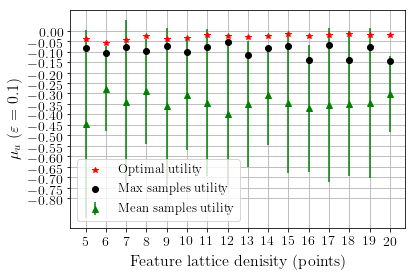

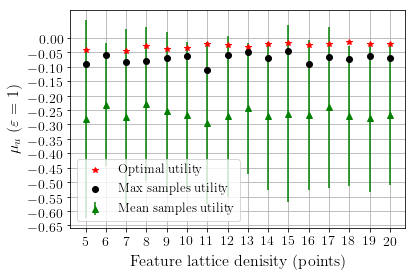

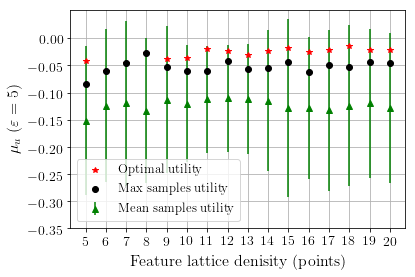

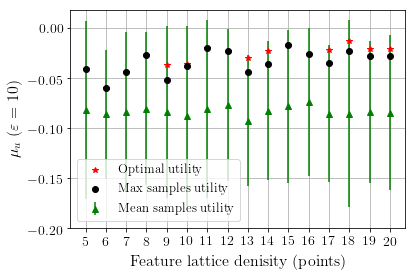

In [18]:
plt.errorbar(xcoordinate, avg_samples_utility, yerr = double_std_utility, fmt = 'g^', label = 'Mean samples utility')
plt.plot(xcoordinate, max_utilities, 'r*', label = 'Optimal utility')
plt.plot(xcoordinate, max_sampled_utilities, 'ko', label = 'Max samples utility')
plt.xticks(xcoordinate)
plt.yticks(np.arange(-0.8, 0.02, step = 0.05))
plt.xlabel('Feature lattice denisity (points)', fontsize = 16)
plt.ylabel(r'$\mu_u$ ($\varepsilon = 0.1$)', fontsize = 16)
plt.legend(fontsize = 13)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_samples_utility_eps_1, yerr = double_std_utility_eps_1, fmt = 'g^', label = 'Mean samples utility')
plt.plot(xcoordinate, max_utilities, 'r*', label = 'Optimal utility')
plt.plot(xcoordinate, max_sampled_utilities_eps_1, 'ko', label = 'Max samples utility')
plt.xticks(range(5,21))
plt.yticks(np.arange(-0.65, 0.02, step = 0.05))
plt.xlabel('Feature lattice denisity (points)', fontsize = 16)
plt.ylabel(r'$\mu_u$ ($\varepsilon = 1$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize = 13)
plt.show()

plt.errorbar(xcoordinate, avg_samples_utility_eps_5, yerr = double_std_utility_eps_5, fmt = 'g^', label = 'Mean samples utility')
plt.plot(xcoordinate, max_utilities, 'r*', label = 'Optimal utility')
plt.plot(xcoordinate, max_sampled_utilities_eps_5, 'ko', label = 'Max samples utility')
plt.xticks(range(5,21))
plt.yticks(np.arange(-0.35, 0.02, step = 0.05))
plt.xlabel('Feature lattice denisity (points)', fontsize = 16)
plt.ylabel(r'$\mu_u$ ($\varepsilon = 5$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize = 13)
plt.show()

plt.errorbar(xcoordinate, avg_samples_utility_eps_10, yerr = double_std_utility_eps_10, fmt = 'g^', label = 'Mean samples utility')
plt.plot(xcoordinate, max_utilities, 'r*', label = 'Optimal utility')
plt.plot(xcoordinate, max_sampled_utilities_eps_10, 'ko', label = 'Max samples utility')
plt.xticks(range(5,21))
plt.yticks(np.arange(-0.2, 0.02, step = 0.05))
plt.xlabel('Feature lattice denisity (points)', fontsize = 16)
plt.ylabel(r'$\mu_u$ ($\varepsilon = 10$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize = 13)
plt.show()

#### RMSE plots

The variance/mean of ADASSP blows up when $\varepsilon$ is around $1$. For example, when setting $\varepsilon = 0.8$, the standard deviation of the ADASSP solution is $23.60$ while the mean is $5.07$ while the minimum RMSE error is $0.03$. This is caused by one sample, for which the RMSE is $120.707$. For that example, the regression coefficients are $-392.68$ and $330.50$. The same sample causes the large standard deviation for the $\varepsilon = 1$ case (plotted). 

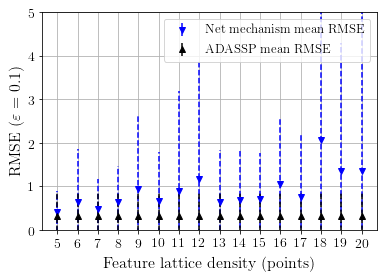

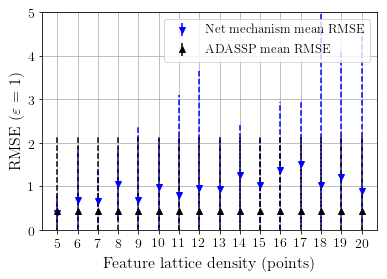

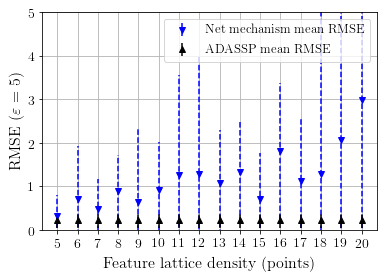

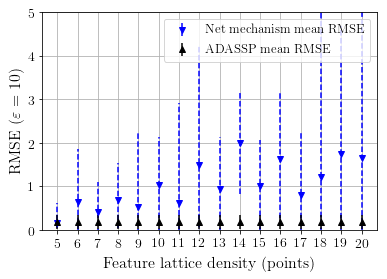

In [19]:
eb = plt.errorbar(xcoordinate, mean_predictive_errs_netmech, yerr = double_std_predictive_errs_netmech, fmt = 'bv', label = 'Net mechanism mean RMSE')
eb[-1][0].set_linestyle('--')
plt.xticks(xcoordinate)
# plt.axhline(y = mean_predictive_err_adassp, color = 'r', linestyle='--', label = 'ADASSP mean RMSE')
eb1 = plt.errorbar(xcoordinate, [mean_predictive_err_adassp]*len(xcoordinate), yerr = [double_std_predictive_err_adassp]*len(xcoordinate), fmt = 'k^', label = 'ADASSP mean RMSE')
eb1[-1][0].set_linestyle('--')
#plt.yticks(np.arange(0, 0.8, step = 0.05))
plt.ylim([0, 5])
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'RMSE ($\varepsilon = 0.1$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize=13)
plt.show()

eb =plt.errorbar(xcoordinate, mean_predictive_errs_netmech_eps_1, yerr = double_std_predictive_errs_netmech, fmt = 'bv', label = 'Net mechanism mean RMSE')
eb[-1][0].set_linestyle('--')
plt.xticks(xcoordinate)
#plt.axhline(y = mean_predictive_err_adassp_eps_1, color = 'r', linestyle='--', label = 'ADASSP mean RMSE')
eb = plt.errorbar(xcoordinate, [mean_predictive_err_adassp_eps_1]*len(xcoordinate), yerr = [double_std_predictive_err_adassp_eps_1]*len(xcoordinate), fmt = 'k^', label = 'ADASSP mean RMSE')
eb[-1][0].set_linestyle('--')
#plt.yticks(np.arange(0, 0.8, step = 0.05))
plt.ylim([0, 5])
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'RMSE ($\varepsilon = 1$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize = 13)
plt.show()

eb = plt.errorbar(xcoordinate, mean_predictive_errs_netmech_eps_5, yerr = double_std_predictive_errs_netmech, fmt = 'bv', label = 'Net mechanism mean RMSE')
eb[-1][0].set_linestyle('--')
plt.xticks(xcoordinate)
#plt.axhline(y = mean_predictive_err_adassp_eps_5, color = 'r', linestyle='--', label = 'ADASSP mean RMSE')
eb = plt.errorbar(xcoordinate, [mean_predictive_err_adassp_eps_5]*len(xcoordinate), yerr = [double_std_predictive_err_adassp_eps_5]*len(xcoordinate), fmt = 'k^', label = 'ADASSP mean RMSE')
eb[-1][0].set_linestyle('--')
#plt.yticks(np.arange(0, 0.8, step = 0.05))
plt.ylim([0, 5])
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'RMSE ($\varepsilon = 5$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize=13)
plt.show()

eb = plt.errorbar(xcoordinate, mean_predictive_errs_netmech_eps_10, yerr = double_std_predictive_errs_netmech, fmt = 'bv', label = 'Net mechanism mean RMSE')
eb[-1][0].set_linestyle('--')
plt.xticks(xcoordinate)
#plt.axhline(y = mean_predictive_err_adassp_eps_10, color = 'r', linestyle='--', label = 'ADASSP mean RMSE')
eb = plt.errorbar(xcoordinate, [mean_predictive_err_adassp_eps_10]*len(xcoordinate), yerr = [double_std_predictive_err_adassp_eps_10]*len(xcoordinate), fmt = 'k^', label = 'ADASSP mean RMSE')
#plt.yticks(np.arange(0, 0.8, step = 0.05))
plt.ylim([0, 5])
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'RMSE ($\varepsilon = 10$)', fontsize = 16)
plt.grid(True)
plt.legend(fontsize=13)
plt.show()

## Plots

#### Correlations difference norm (!!!)

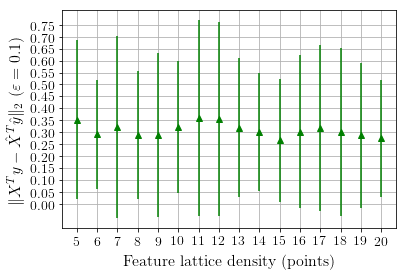

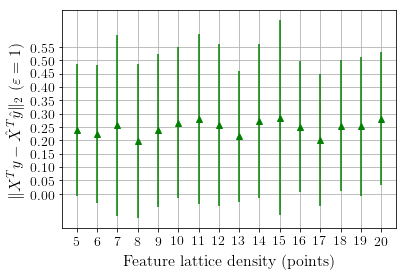

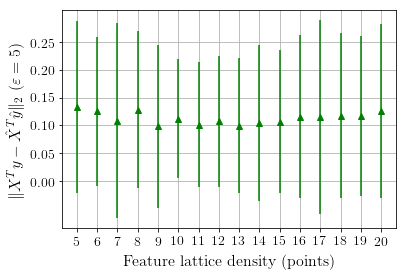

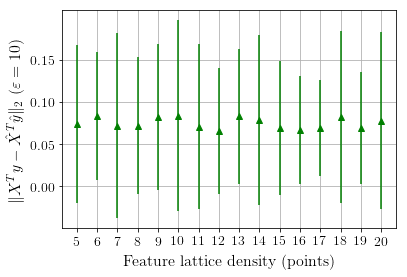

In [20]:
plt.errorbar(xcoordinate, avg_2_norms, yerr = double_std_2_norms, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.8, step = 0.05))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^Ty - \hat{X}^T\hat{y}\|_2$ ($\varepsilon = 0.1$)', fontsize = 16)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_2_norms_eps_1, yerr = double_std_2_norms_eps_1, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.6, step = 0.05))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^Ty - \hat{X}^T\hat{y}\|_2$ ($\varepsilon = 1$)', fontsize = 16)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_2_norms_eps_5, yerr = double_std_2_norms_eps_5, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.3, step = 0.05))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^Ty - \hat{X}^T\hat{y}\|_2$ ($\varepsilon = 5$)', fontsize = 16)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_2_norms_eps_10, yerr = double_std_2_norms_eps_10, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.2, step = 0.05))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^Ty - \hat{X}^T\hat{y}\|_2$ ($\varepsilon = 10$)', fontsize = 16)
plt.grid(True)
plt.show()

#### Frobenius norm

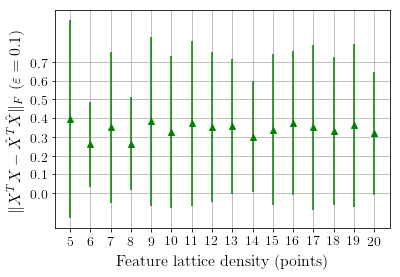

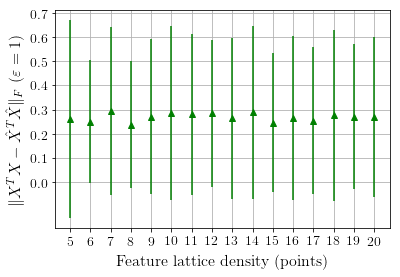

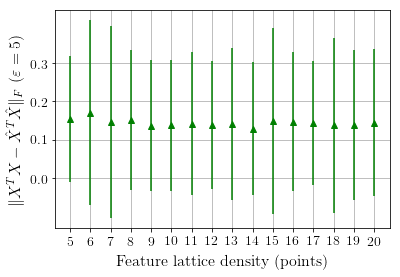

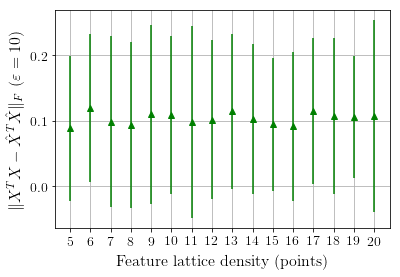

In [21]:
plt.errorbar(xcoordinate, avg_f_norms, yerr = double_std_f_norms, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.8, step = 0.1))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^TX - \hat{X}^T \hat{X} \|_F$ ($\varepsilon = 0.1$)', fontsize = 16)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_f_norms_eps_1, yerr = double_std_f_norms_eps_1, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.8, step = 0.1))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^TX - \hat{X}^T \hat{X} \|_F$ ($\varepsilon = 1$)', fontsize = 16)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_f_norms_eps_5, yerr = double_std_f_norms_eps_5, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.4, step = 0.1))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^TX - \hat{X}^T \hat{X} \|_F$ ($\varepsilon = 5$)', fontsize = 16)
plt.grid(True)
plt.show()

plt.errorbar(xcoordinate, avg_f_norms_eps_10, yerr = double_std_f_norms_eps_10, fmt = 'g^')
plt.xticks(xcoordinate)
plt.yticks(np.arange(0, 0.3, step = 0.1))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel(r'$\|X^TX - \hat{X}^T \hat{X} \|_F$ ($\varepsilon = 10$)', fontsize = 16)
plt.grid(True)
plt.show()

#### Optimal utility

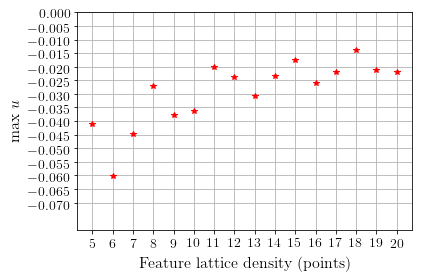

In [22]:
plt.plot(xcoordinate, max_utilities, 'r*', label = 'Optimal utility')
plt.xticks(xcoordinate)
plt.yticks(np.arange(-0.07, 0.0, step = 0.005))
plt.xlabel('Feature lattice density (points)', fontsize = 16)
plt.ylabel('max $u$', fontsize = 16)
plt.ylim([-0.08,0])
plt.grid(True)
# plt.legend(fontsize = 13)
plt.show()